In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("D:\\SUBHAJIT\\PG_ML_INTELLIPAAT\\Practice\\Machine learning\\Cardekho-Logistic_regression\\cardekho_data.csv")
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [5]:
print(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [15]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [23]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data["Fuel_Type"].nunique()

3

In [11]:
data["Seller_Type"].nunique()

2

In [13]:
data["Transmission"].nunique()

2

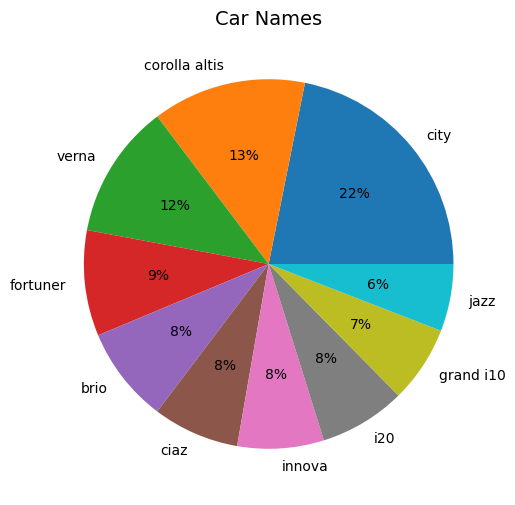

In [35]:
plt.figure(figsize=(8,6))
top_cars_name = data["Car_Name"].value_counts().nlargest(10)
labels = top_cars_name.index
plt.pie(top_cars_name,labels=labels,autopct='%.f%%')
plt.title("Car Names", fontsize=14)
plt.show()

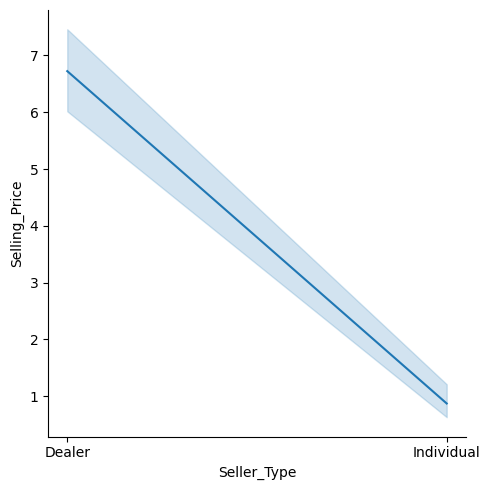

In [37]:
sns.relplot(x="Seller_Type",y="Selling_Price",data=data,kind="line")

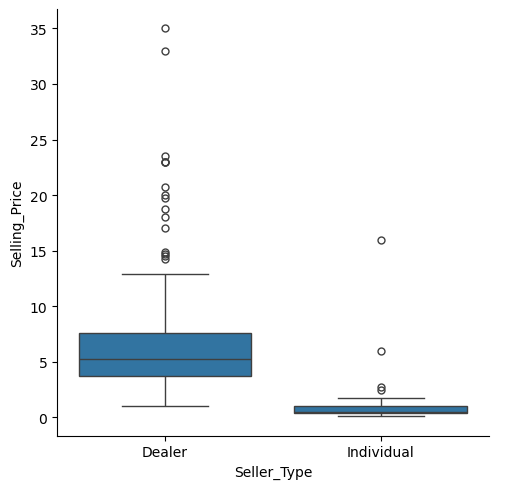

In [39]:
sns.catplot(x="Seller_Type",y="Selling_Price",data=data,kind="box")

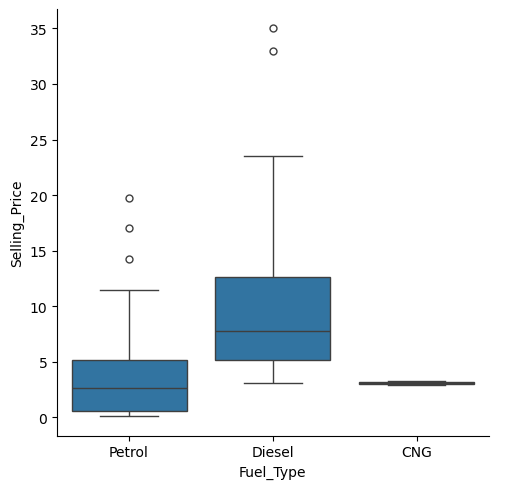

In [41]:
sns.catplot(x="Fuel_Type",y="Selling_Price",data=data,kind="box")

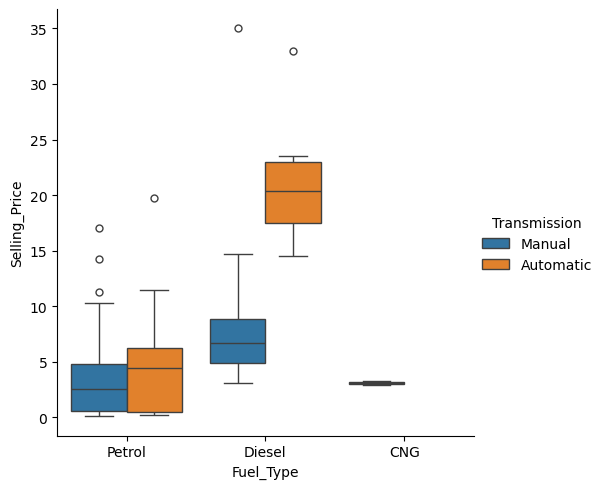

In [43]:
sns.catplot(x="Fuel_Type",y="Selling_Price",hue="Transmission",data=data,kind="box")

In [45]:
!pip install autoviz

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [49]:
AV=AutoViz_Class()
report = AV.AutoViz(data)

Shape of your Data Set loaded: (301, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 2 duplic

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Car_Name,object,0.000000,32,,,64 rare categories: Too many to list. Group them into a single category or drop the categories.
Year,int64,0.000000,5,2003.000000,2018.000000,Possible date-time colum: transform before modeling step.
Selling_Price,float64,0.000000,NA,0.100000,35.000000,Column has 16 outliers greater than upper bound (13.73) or lower than lower bound(-6.88). Cap them or remove them.
Present_Price,float64,0.000000,NA,0.320000,92.600000,"Column has 14 outliers greater than upper bound (22.80) or lower than lower bound(-11.76). Cap them or remove them., Column has a high correlation with ['Selling_Price']. Consider dropping one of them."
Kms_Driven,int64,0.000000,68,500.000000,500000.000000,Column has 8 outliers greater than upper bound (99708.75) or lower than lower bound(-35825.25). Cap them or remove them.
Fuel_Type,object,0.000000,1,,,1 rare categories: ['CNG']. Group them into a single category or drop the categories.
Seller_Type,object,0.000000,0,,,No issue
Transmission,object,0.000000,0,,,No issue
Owner,int64,0.000000,1,0.000000,3.000000,Column has 11 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


Number of All Scatter Plots = 3
All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [51]:
q1=data["Present_Price"].quantile(0.25)
q3=data["Present_Price"].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
print(iqr)
lower_band=q1-(1.5*iqr)
upper_band=q3+(1.5*iqr)
print(lower_band)
print(upper_band)

1.2
9.9
8.700000000000001
-11.850000000000001
22.950000000000003


In [57]:
data=data[(data["Present_Price"]>= lower_band) & (data["Present_Price"]<= upper_band)]

In [59]:
q1=data["Kms_Driven"].quantile(0.25)
q3=data["Kms_Driven"].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
print(iqr)
lower_band=q1-(1.5*iqr)
upper_band=q3+(1.5*iqr)
print(lower_band)
print(upper_band)
data=data[(data["Kms_Driven"]>= lower_band) & (data["Kms_Driven"]<= upper_band)]

15000.0
46853.0
31853.0
-32779.5
94632.5


In [61]:
numerical_features = ['Selling_Price','Present_Price','Kms_Driven']
sns.pairplot(data[numerical_features])
plt.show()

In [63]:
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr())
plt.show

<function matplotlib.pyplot.show(*, block=None)>

In [65]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()
data["Fuel_Type"]=le.fit_transform(data["Fuel_Type"])

In [71]:
data["Seller_Type"]=le.fit_transform(data["Seller_Type"])
data["Transmission"]=le.fit_transform(data["Transmission"])

In [73]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014      3.35           5.59          27000        2       
1      sx4  2013      4.75           9.54          43000        1       
2     ciaz  2017      7.25           9.85           6900        2       
3  wagon r  2011      2.85           4.15           5200        2       
4    swift  2014      4.60           6.87          42450        1       

   Seller_Type  Transmission  Owner  
0       0             1         0    
1       0             1         0    
2       0             1         0    
3       0             1         0    
4       0             1         0    


In [77]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [83]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9557358392912215

In [85]:
y_pred=model.predict(x_test)

In [89]:
mse=mean_squared_error(y_test,y_pred)
rmse=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)

0.44359698635294115
0.4484611764705884
0.9557358392912215
